In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras import layers, models
import pandas as pd

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("varpit94/google-stock-data")

print("Path to dataset files:", path)

c:\Users\Janhvi Katakdhond\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 101k/101k [00:00<00:00, 122kB/s]

Extracting files...
Path to dataset files: C:\Users\Janhvi Katakdhond\.cache\kagglehub\datasets\varpit94\google-stock-data\versions\6


In [4]:
data = pd.read_csv(path + "/GOOGL.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602


In [6]:
training_set = data['Open'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = scaler.fit_transform(training_data)

In [7]:
xtrain, ytrain = [], []
for i in range(60, len(training_set_scaled)):
    xtrain.append(training_set_scaled[i-60:i, 0])
    ytrain.append(training_set_scaled[i, 0])
xtrain, ytrain = np.array(xtrain), np.array(ytrain)
xtrain = xtrain.reshape((xtrain.shape[0], xtrain.shape[1], 1))

In [8]:
model = models.Sequential([
    layers.SimpleRNN(50, return_sequences=False, input_shape=(xtrain.shape[1], 1)),
    layers.Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

c:\Users\Janhvi Katakdhond\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
history = model.fit(xtrain, ytrain, epochs=10, batch_size=32, verbose=0)

In [10]:
predicted_stock_price = model.predict(xtrain)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
real_stock_price = scaler.inverse_transform(training_set_scaled[60:])

137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


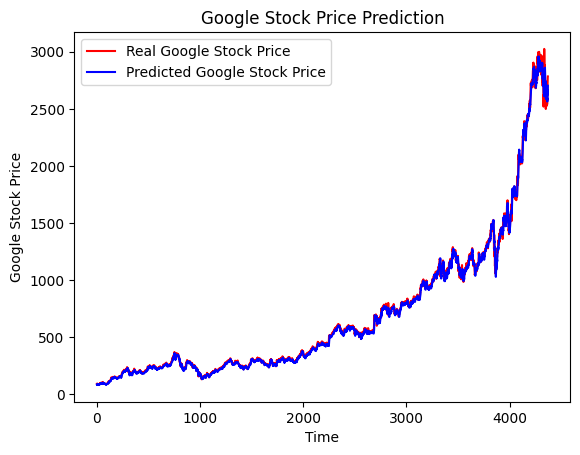

In [11]:
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.title('Google Stock Price Prediction')
plt.show()